<a href="https://colab.research.google.com/github/wilsonfffs/CODING-DOJO/blob/main/Ejercicio_sobre_RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import keras
from keras import backend as K
from keras.models import Sequential,Model
from keras.layers import Activation,Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.layers import LeakyReLU,Reshape,UpSampling2D,Conv2DTranspose
from keras.layers import BatchNormalization,Input,Lambda
from keras.layers import Embedding,Flatten,dot
from keras import regularizers
from keras.losses import mse,binary_crossentropy
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


In [69]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo /Codigo /week11/fashion-mnist_test.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
train_data = np.array(df, dtype='float32')
test_data = np.array(df, dtype='float32')

X_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

X_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [79]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345,)

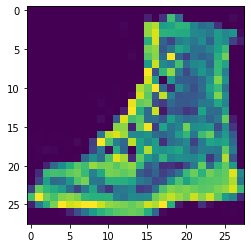

In [81]:
image = x_train[50, :].reshape((28, 28))

plt.imshow(image)
plt.show()

In [83]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [84]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [85]:
input_shape = X_train.shape[1:4]
input_shape

(28, 28, 1)

In [86]:
model = Sequential()

In [87]:
model.add(Conv2D(filters = 8, # Cantidad de filtros
                 kernel_size = 3, # Tamaño de cada filtro
                 input_shape = input_shape)) # Forma de la entrada de datos
# Pooling layer
model.add(MaxPooling2D(pool_size = 2)) # Tamaño de pooling
# Capa de aplanamiento
model.add(Flatten())
# Capa de salida
model.add(Dense(10, # Número de clases
                activation = 'softmax')) # Función de activación utilizada(softmax)

In [88]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [89]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=20)

Epoch 1/20
250/250 [==============================] - 7s 26ms/step - loss: 0.8743 - acc: 0.6945 - val_loss: 0.5819 - val_acc: 0.7963
Epoch 2/20
250/250 [==============================] - 6s 26ms/step - loss: 0.5445 - acc: 0.8039 - val_loss: 0.5009 - val_acc: 0.8289
Epoch 3/20
250/250 [==============================] - 5s 18ms/step - loss: 0.4856 - acc: 0.8315 - val_loss: 0.4840 - val_acc: 0.8312
Epoch 4/20
250/250 [==============================] - 3s 14ms/step - loss: 0.4576 - acc: 0.8403 - val_loss: 0.4544 - val_acc: 0.8407
Epoch 5/20
250/250 [==============================] - 4s 14ms/step - loss: 0.4388 - acc: 0.8451 - val_loss: 0.4098 - val_acc: 0.8621
Epoch 6/20
250/250 [==============================] - 4s 14ms/step - loss: 0.4132 - acc: 0.8579 - val_loss: 0.4143 - val_acc: 0.8529
Epoch 7/20
250/250 [==============================] - 4s 14ms/step - loss: 0.4001 - acc: 0.8575 - val_loss: 0.4032 - val_acc: 0.8572
Epoch 8/20
250/250 [==============================] - 3s 14ms/step - 

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [ ]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();